# Plot Maker For Graduate Architecture Project

In [1]:
#!/usr/bin/env python

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import results_scraper

df_headers = ["Processor", "L1i", "L1d", "L2", "Kernel", "Bugs", "aobench", "aobenchv", "cyclictest", "cyclictestv", "primesieve", "primesievev", "pybench", "pybenchv", "ramspeed", "ramspeedv"]

#### Read Data from /results.csv file

In [2]:
results_DF = pd.read_csv("../results.csv")
results_DF

,machine,kernel,aobench,cyclictest,primesieve,pybench ramspeed,Unnamed: 6
0,AMD C-50 Processor,4.9.0-4-amd64,362.62,16,1350.03,12632,2566.35
1,Intel(R) Core(TM) i5 CPU M 450 @ 2.40GHz,4.9.0-4-amd64,90.14,6,268.60,3017,7316.17
2,AMD Athlon(tm) X4 750K Quad Core Processor,4.9.0-6-amd64,83.88,9,741.71,2439,5279.28
3,Intel(R) Core(TM) i5-7500T CPU @ 2.70GHz,4.9.0-4-amd64,56.77,1,77.26,1639,11108.87
4,Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz,4.9.0-4-amd64,55.18,1,92.92,1592,18691.53
5,Intel(R) Core(TM) i5 CPU M 450 @ 2.40GHz,4.9.0-6-amd64,88.72,7,268.71,3018,7382.30
6,Intel(R) Pentium(R) Dual CPU T3400 @ 2.16GHz,4.9.0-4-amd64,141.55,18,489.15,3995,2722.46
7,Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz,4.9.0-4-amd64,66.09,2,234.29,2205,13080.53
8,Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz,4.9.0-6-amd64,55.53,1,92.53,1586,18550.64
9,AMD Athlon(tm) X4 750K Quad Core Processor,4.9.0-4-amd64,85.40,9,749.98,2431,5228.95


In [3]:
tests = [10015,10244,12948,14077,14857,18323,19340,20361,21364,21418,22108,2483,25621,25666,25719,26448,27330,27628,29766,31336,496,5649]


In [4]:
# results_scraper.pull_test(str(tests[0]))
# df1 = pd.DataFrame(results_scraper.pull_test(str(tests[0]))
df1 = pd.DataFrame()
for test in tests:
#     print(np.array(results_scraper.pull_test(str(test)),dtype=object))
    data = pd.DataFrame(results_scraper.pull_test(str(test)))
    data = data.transpose()
    df1 = df1.append(data)
    print(data)
#     df1

../test-10015/aobench-test-10015/composite.xml
../test-10015/cyclictest-test-10015/composite.xml
../test-10015/primesieve-test-10015/composite.xml
../test-10015/pybench-test-10015/composite.xml
../test-10015/ramspeed-test-10015/composite.xml
['AMD C-50 Processor', '32', '32', '512', '4.9.51-1', 'fxsave_leak sysret_ss_attrs null_seg', 362.62, '365.0452940464:361.38993310928:361.43190217018', 16.0, '', 1350.03, '1340.636:1340.292:1369.166', 12632.0, '12690:12533:12673', 2566.35, '']
                   0   1   2    3         4   \
0  AMD C-50 Processor  32  32  512  4.9.51-1   

                                     5       6   \
0  fxsave_leak sysret_ss_attrs null_seg  362.62   

                                               7   8  9        10  \
0  365.0452940464:361.38993310928:361.43190217018  16     1350.03   

                           11     12                 13       14 15  
0  1340.636:1340.292:1369.166  12632  12690:12533:12673  2566.35     
../test-10244/aobench-test-10244/co

0  268.114:268.751:269.252  3018  2985:3006:3063  7382.3     
../test-2483/aobench-test-2483/composite.xml
../test-2483/cyclictest-test-2483/composite.xml
../test-2483/primesieve-test-2483/composite.xml
../test-2483/pybench-test-2483/composite.xml
../test-2483/ramspeed-test-2483/composite.xml
['Intel(R) Pentium(R) Dual  CPU  T3400  @ 2.16GHz', '32', '32', '1024', '4.9.51-1', '', 141.55, '141.60066795349:141.25101685524:141.79426217079', 18.0, '20:19:16:19:17:18', 489.15, '444.547:468.436:503.293:505.038:497.086:516.517', 3995.0, '3975:3998:4012', 2722.46, '']
                                                0   1   2     3         4  5   \
0  Intel(R) Pentium(R) Dual  CPU  T3400  @ 2.16GHz  32  32  1024  4.9.51-1      

       6                                                7   8   \
0  141.55  141.60066795349:141.25101685524:141.79426217079  18   

                  9       10                                               11  \
0  20:19:16:19:17:18  489.15  444.547:468.436:503.293:505

In [5]:
df1 = df1.reset_index(drop=True)
df1.columns = df_headers

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df1)

,Processor,L1i,L1d,L2,Kernel,Bugs,aobench,aobenchv,cyclictest,cyclictestv,primesieve,primesievev,pybench,pybenchv,ramspeed,ramspeedv
0,AMD C-50 Processor,32,32,512,4.9.51-1,fxsave_leak sysret_ss_attrs null_seg,362.62,365.0452940464:361.38993310928:361.43190217018,16,,1350.03,1340.636:1340.292:1369.166,12632,12690:12533:12673,2566.35,
1,Intel(R) Core(TM) i5-2520M CPU @ 2.50GHz,32,32,256,4.9.82-1,cpu_meltdown spectre_v1 spectre_v2,66.35,66.338290929794:66.364619970322:66.337608098984,2,,244.51,215.722:253.389:244.459:248.624:251.462:253.377,2284,2288:2271:2293,6735.45,
2,Intel(R) Core(TM) i7-3632QM CPU @ 2.20GHz,32,32,256,4.9.82-1,cpu_meltdown spectre_v1 spectre_v2,63.13,63.73819899559:62.881282091141:62.767226934433,2,,103.24,103.173:103.243:103.295,2169,2166:2171:2171,14885,
3,Intel(R) Core(TM) i5 CPU M 450 @ 2.40GHz,32,32,256,4.9.51-1,,90.14,94.562704086304:88.969377994537:88.96872186660...,6,7:6:6:6:6:7,268.6,266.412:270.393:268.991,3017,3020:3014:3017,7316.17,
4,Intel(R) Core(TM) i3-2330M CPU @ 2.20GHz,32,32,256,4.9.82-1,cpu_meltdown spectre_v1 spectre_v2,96.61,96.494286060333:96.843542098999:96.505916118622,4,,290.55,283.712:293.015:294.913,3334,3315:3334:3354,6764.38,
5,AMD Athlon(tm) X4 750K Quad Core Processor,16,64,2048,4.9.82-1,fxsave_leak sysret_ss_attrs null_seg spectre_v...,83.88,83.861778974533:83.892513036728:83.891149044037,9,,741.71,768.914:708.17:739.35:750.399,2439,2419:2445:2453,5279.28,
6,Intel(R) Core(TM) i5-2520M CPU @ 2.50GHz,32,32,256,4.9.51-1,,66.51,66.705399036407:66.510157108307:66.309184074402,2,,239.39,221.323:245.011:239.78:244.182:246.361:239.707,2289,2294:2293:2279,6748.25,
7,Intel(R) Core(TM) i5-7500T CPU @ 2.70GHz,32,32,256,4.9.51-1,,56.77,56.662035942078:56.739199876785:56.898442983627,1,,77.26,77.364:77.297:77.118,1639,,11108.9,
8,Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz,32,32,256,4.9.51-1,,55.18,55.214612007141:55.136606931686:55.188473939896,1,,92.92,85.938:92.803:95.258:93.889:94.402:95.254,1592,,18691.5,
9,Intel(R) Core(TM) i7-3632QM CPU @ 2.20GHz,32,32,256,4.9.51-1,,63.43,64.790441989899:62.805484056473:62.70054602623,2,,103.38,103.319:103.383:103.452,2168,2159:2174:2171,14976.8,


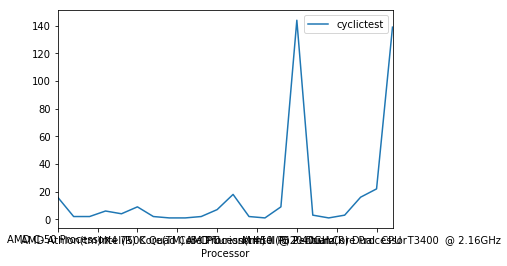

In [19]:
df1.